In [3]:
import sys
sys.path.append('../..')
from lib_train import *
%matplotlib inline

X_train, y_train, idx_train = load_audio_datafiles('X_train.npy', 'y_train.npy', 'idx_train.npy')
print('Loaded train = %d samples.' % len(X_train))

# Normalize samplewise if requested
if conf.normalize == 'samplewise':
    print(' normalize samplewise')
    samplewise_mean_X(X_train)

Loaded train = 65104 samples.
 normalize samplewise


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 16)   144         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 16)   64          Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 16)   0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_c

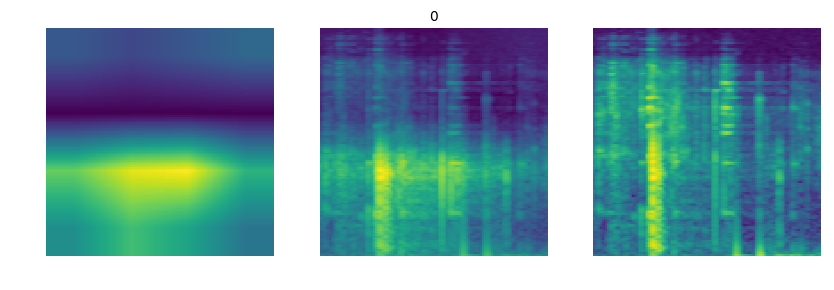

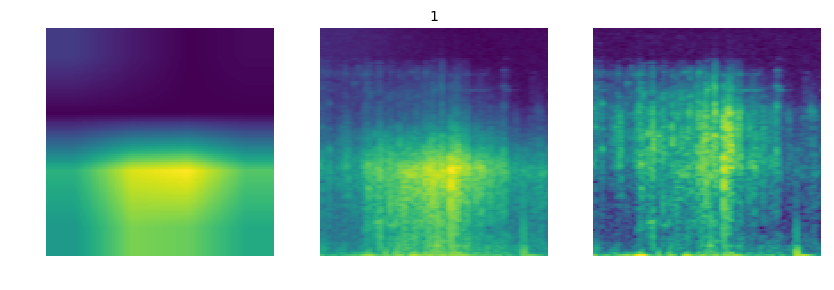

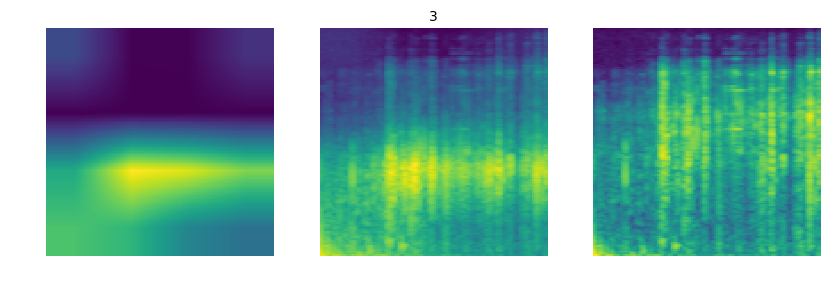

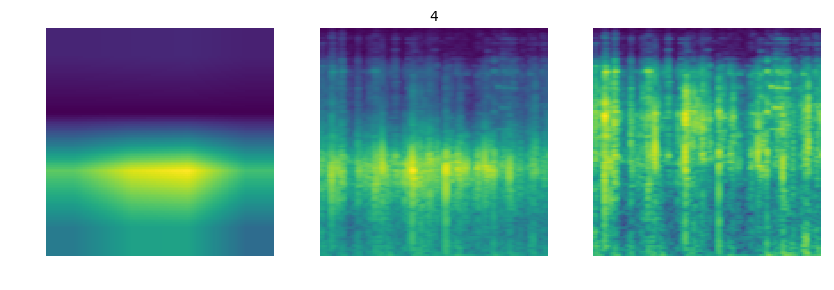

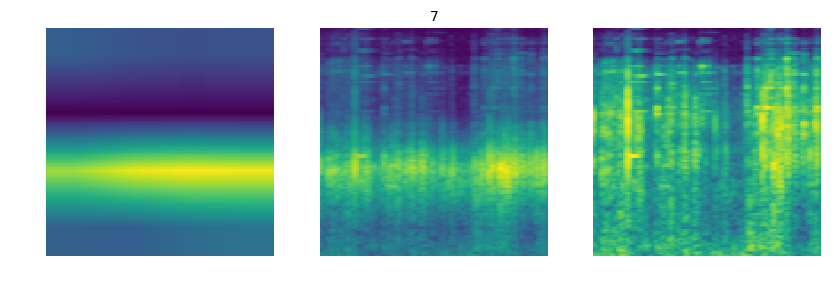

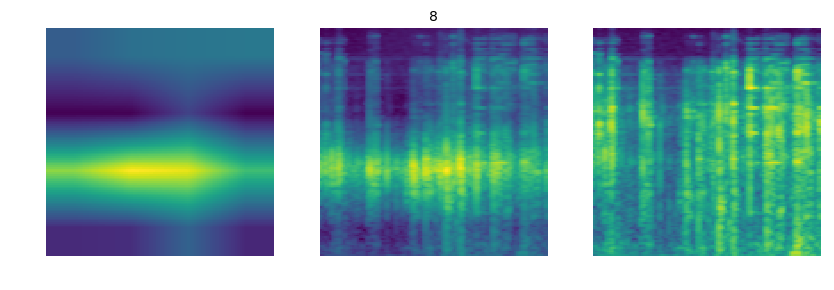

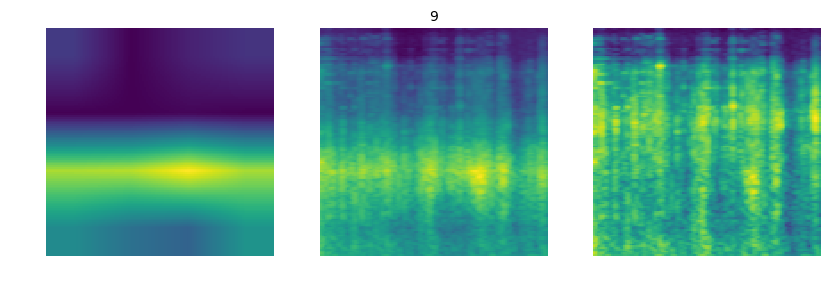

In [6]:
from visualize import visualize_cam_audio

model = create_model(conf, conf.num_classes)
model.load_weights('../../model/mobilenetv2_fsd2018_41cls.h5')

for i, x in enumerate(X_train[100:110]):
    visualize_cam_audio(conf, model, x, '{}'.format(i))

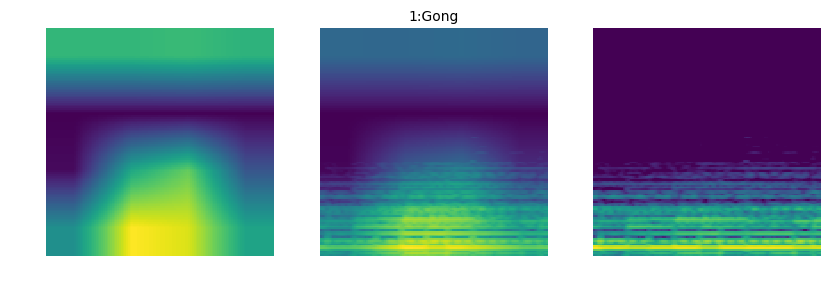

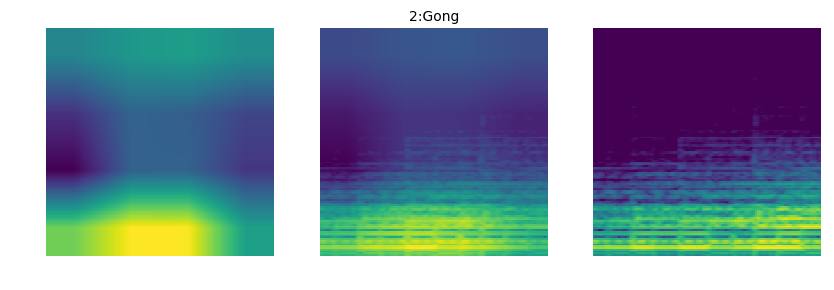

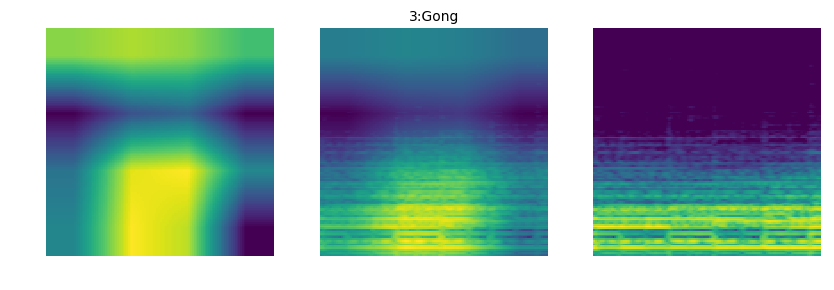

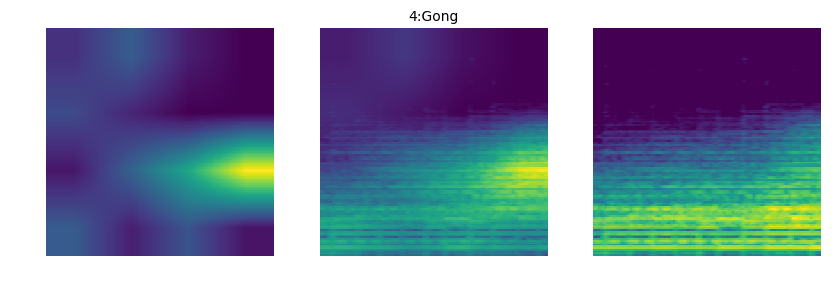

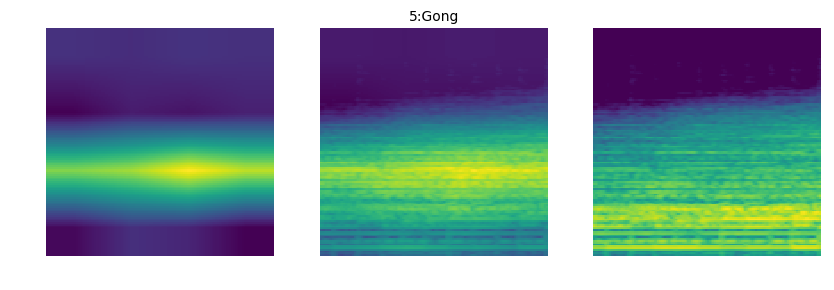

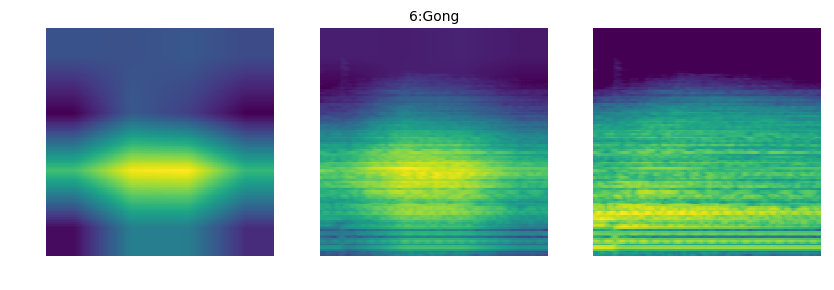

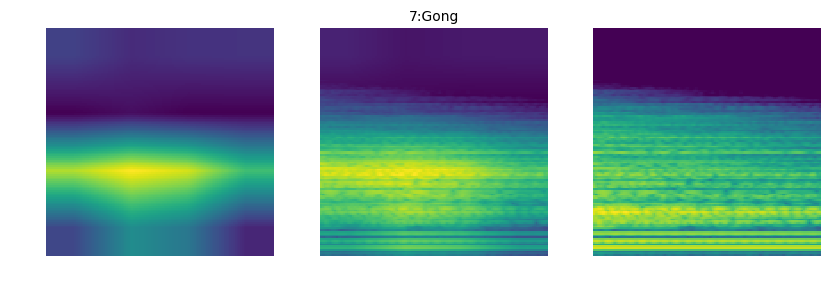

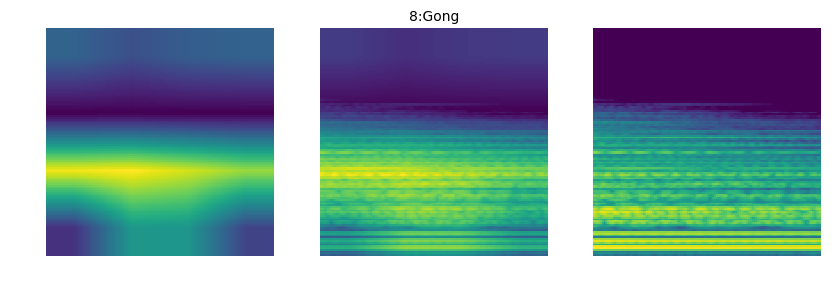

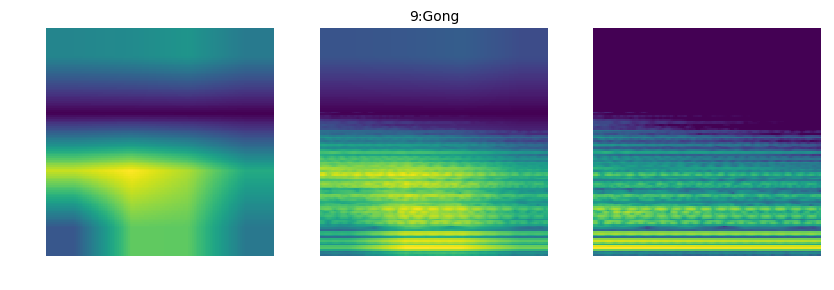

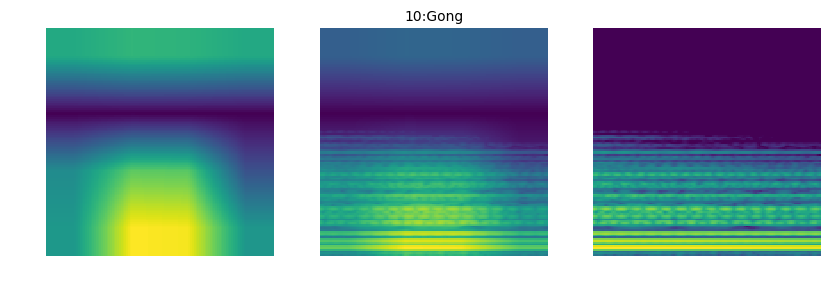

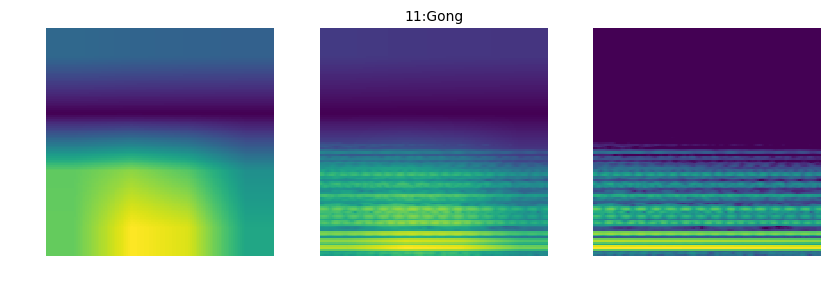

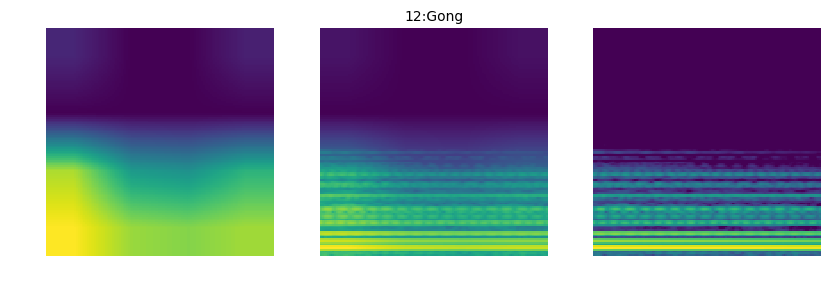

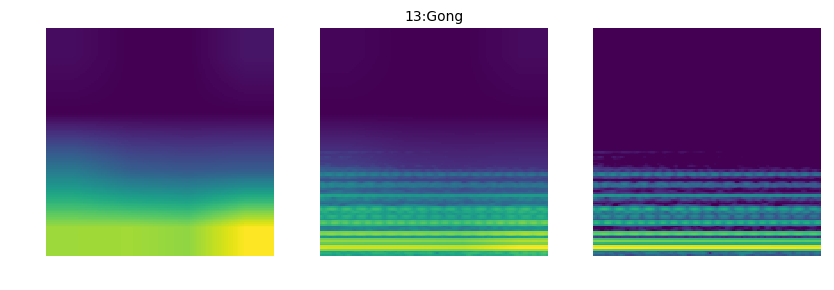

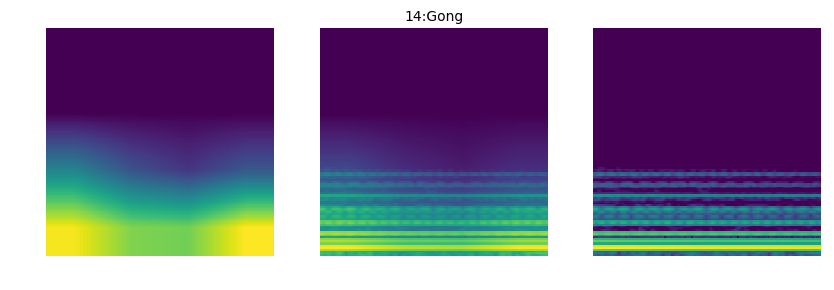

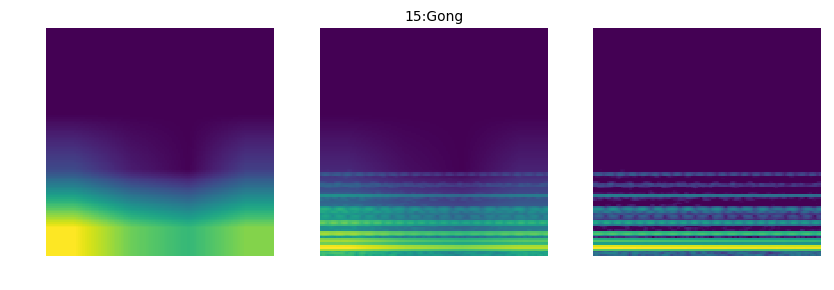

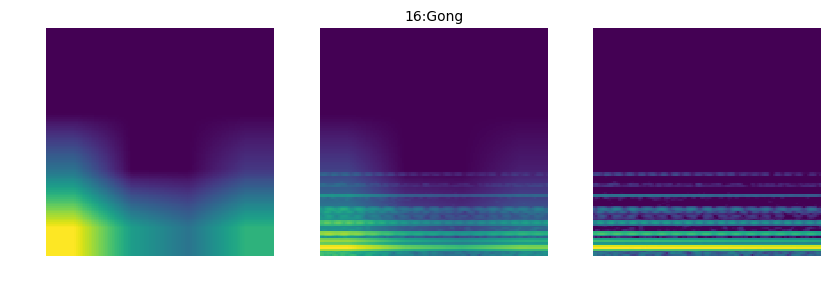

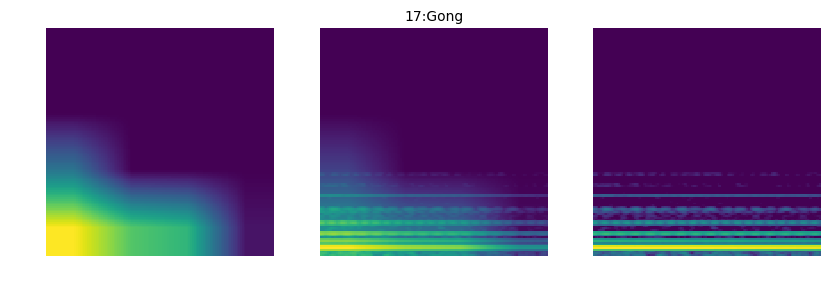

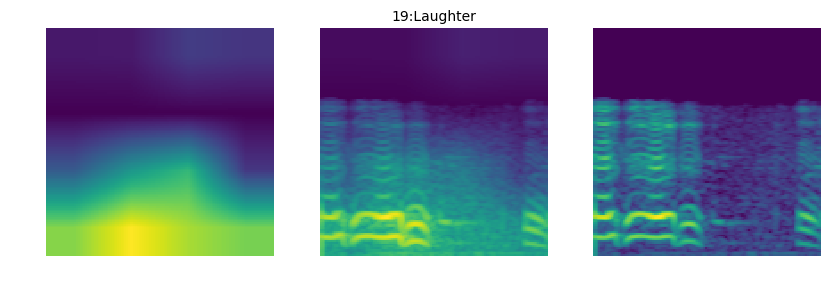

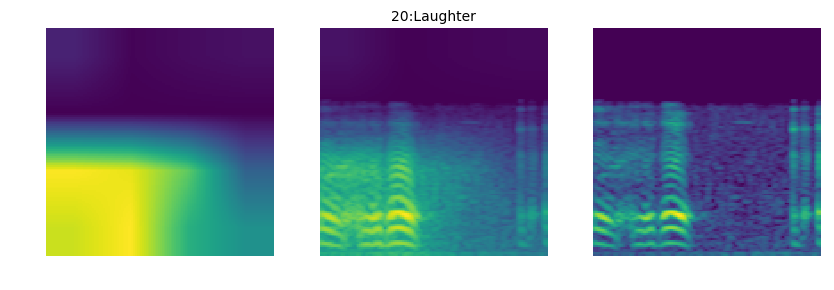

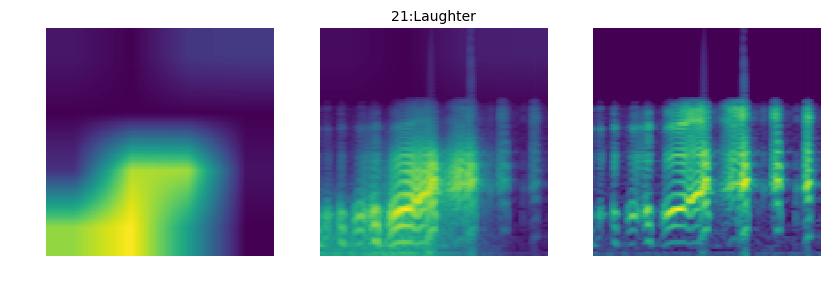

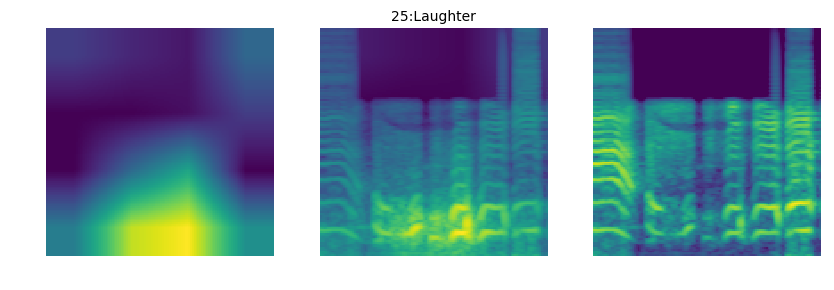

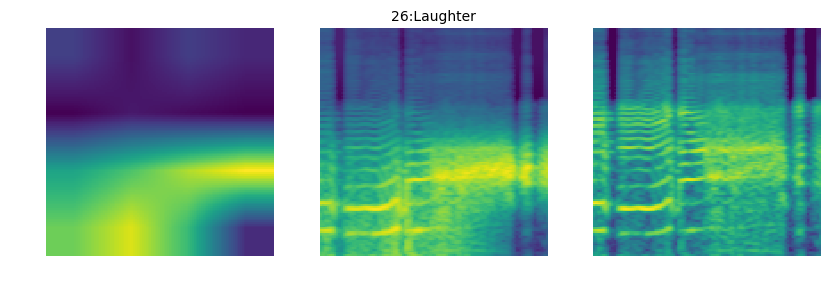

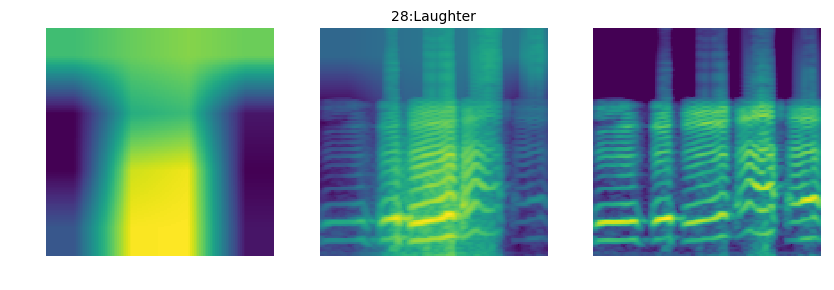

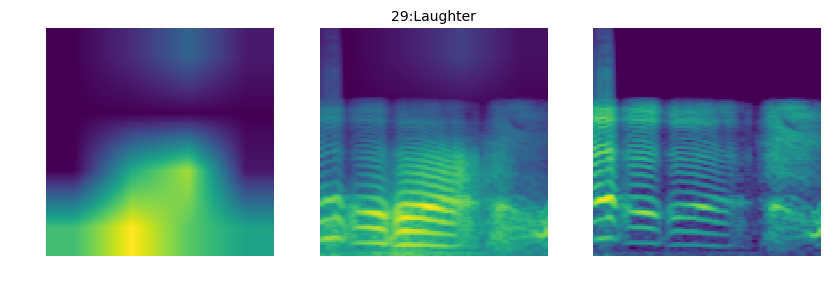

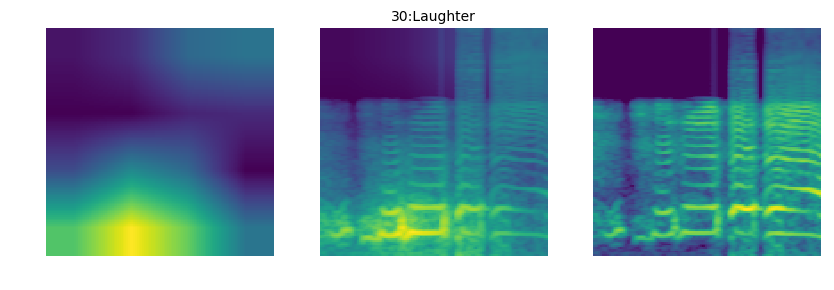

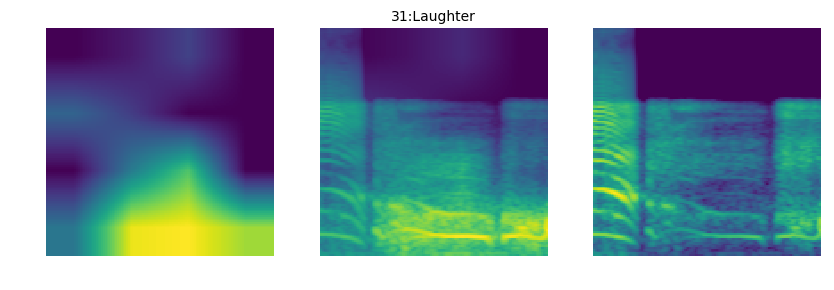

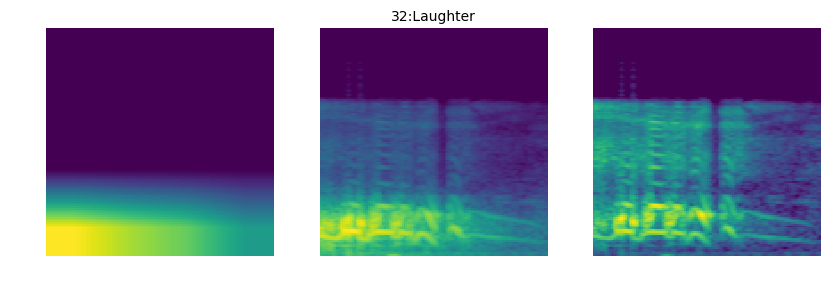

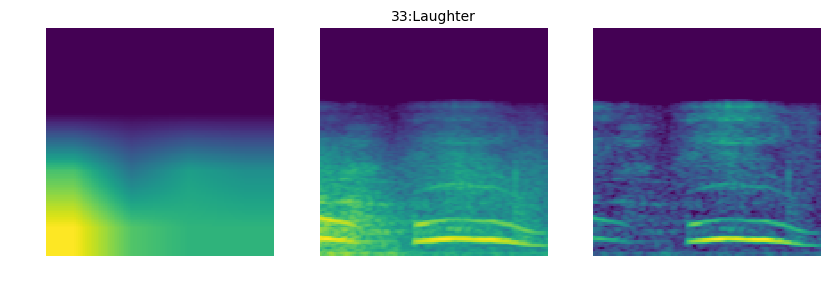

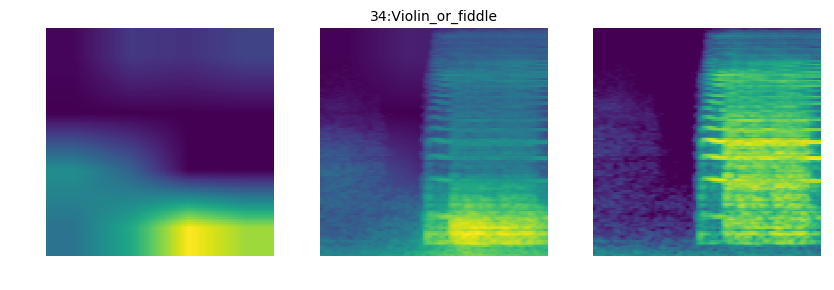

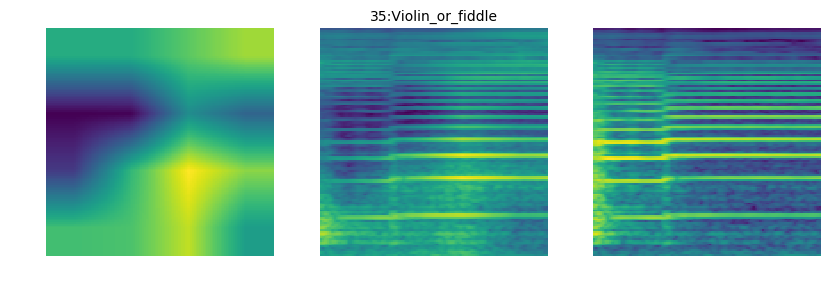

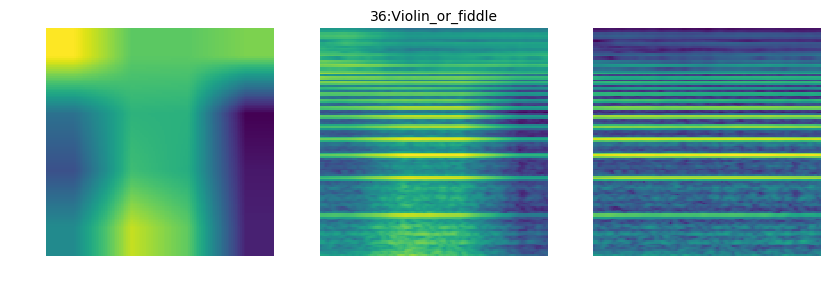

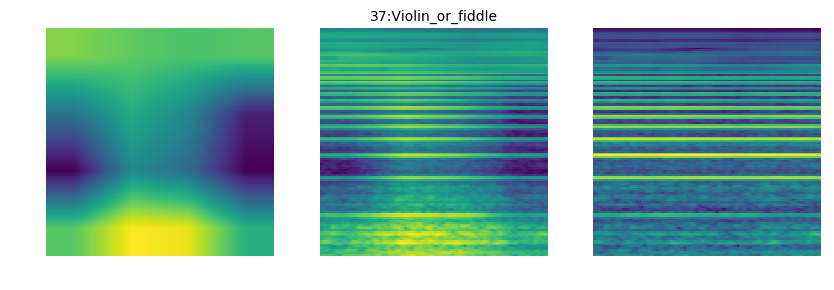

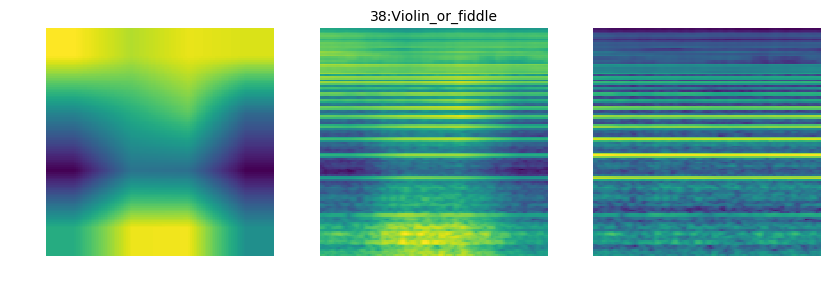

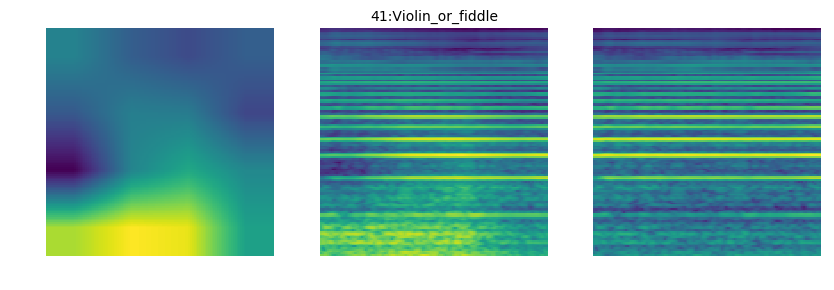

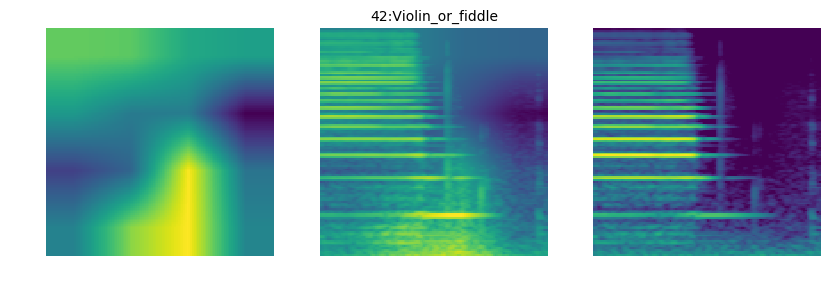

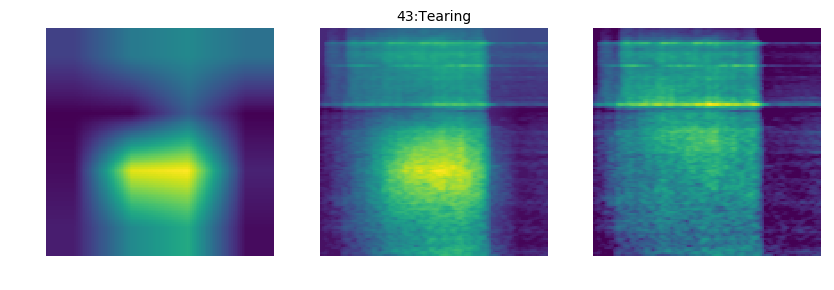

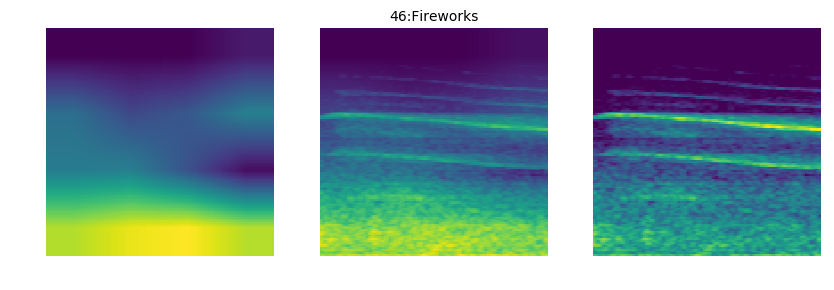

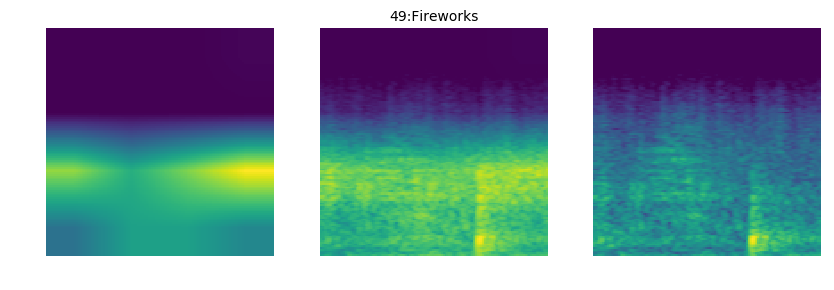

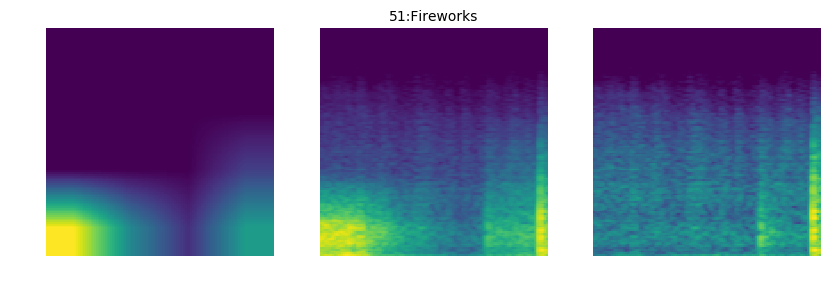

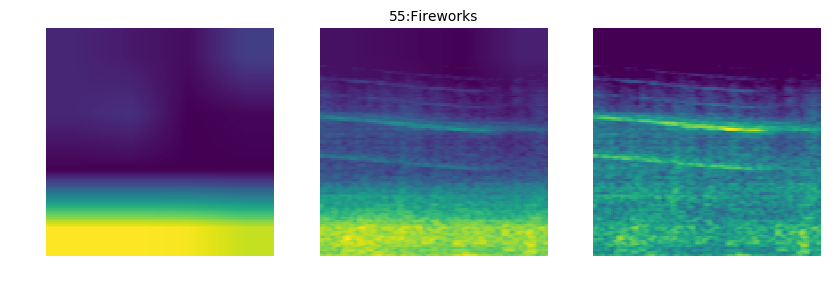

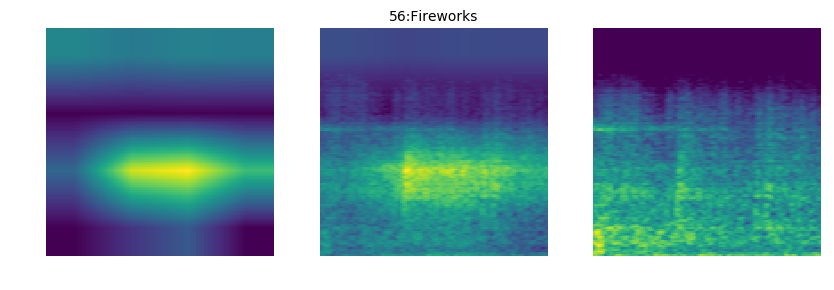

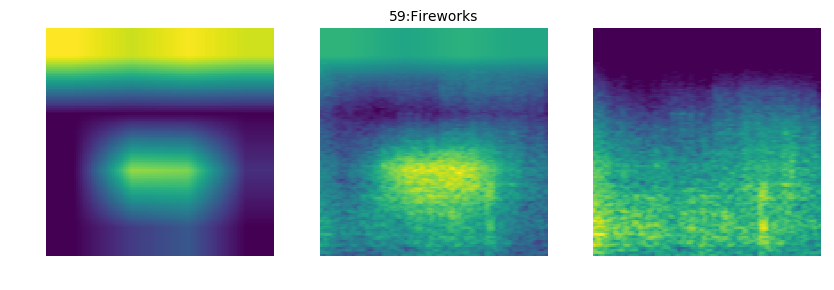

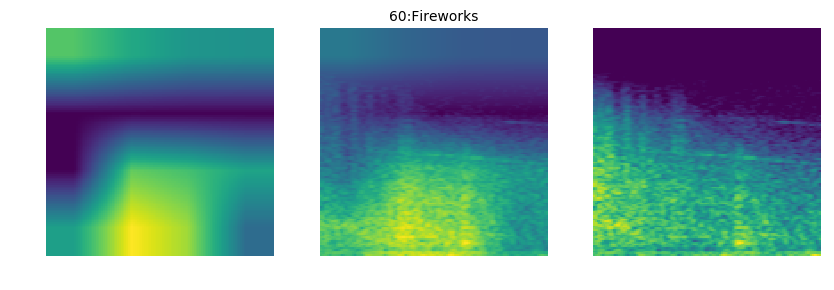

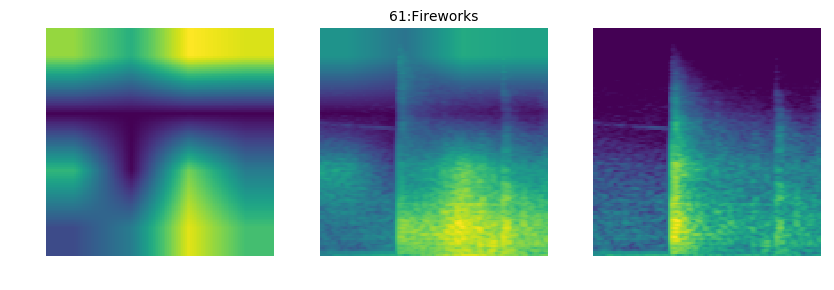

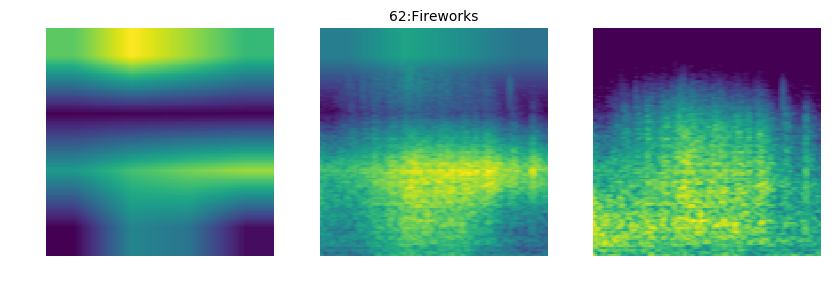

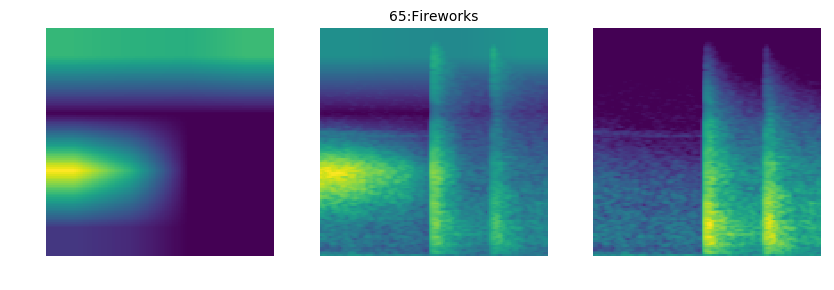

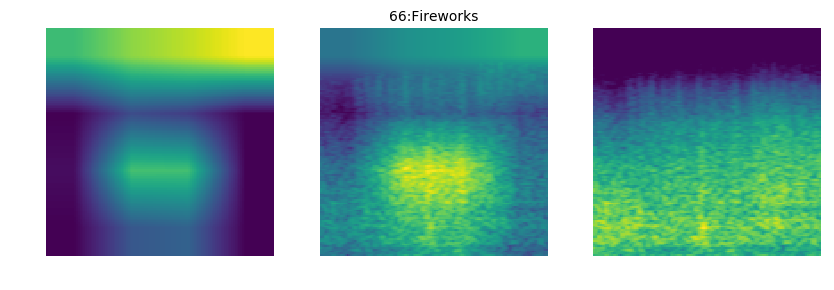

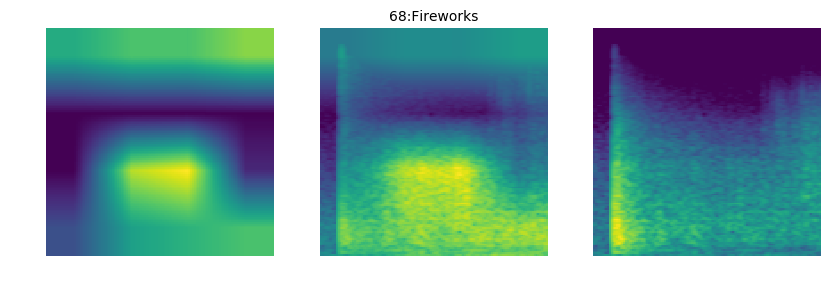

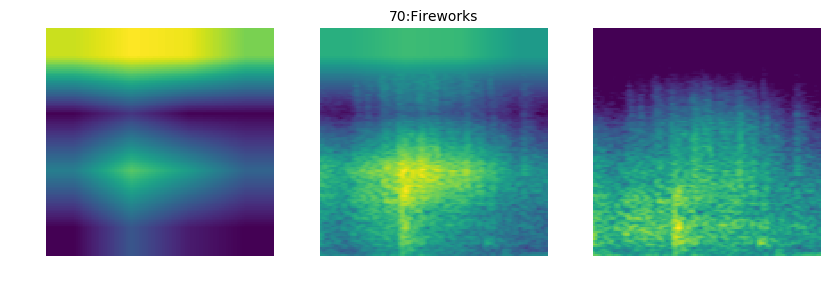

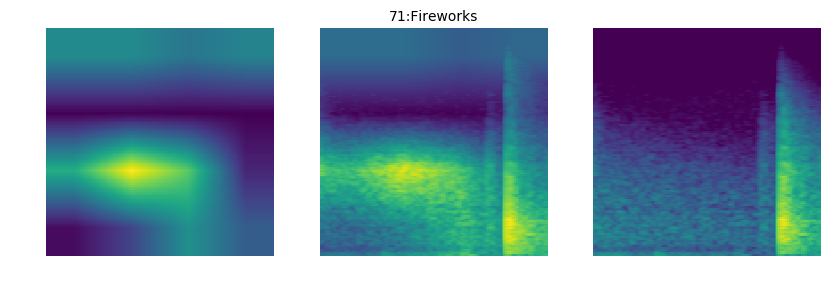

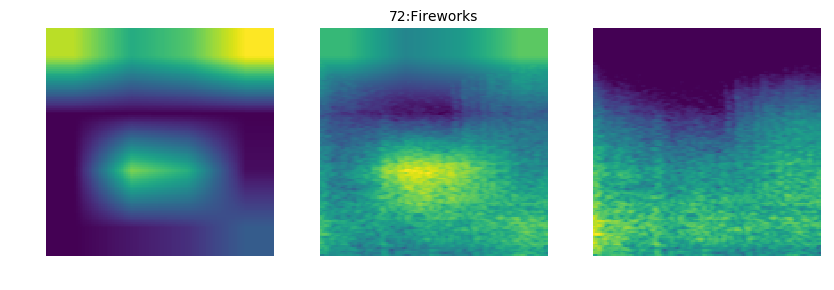

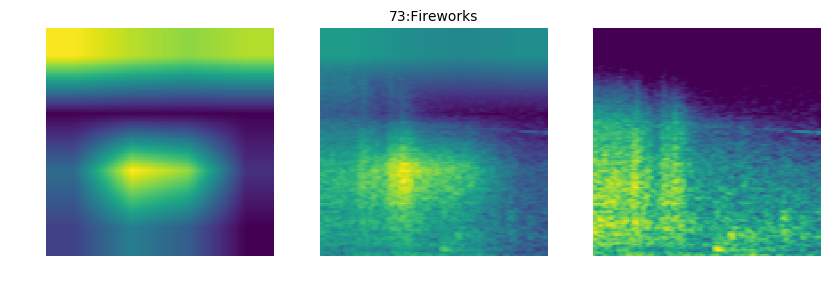

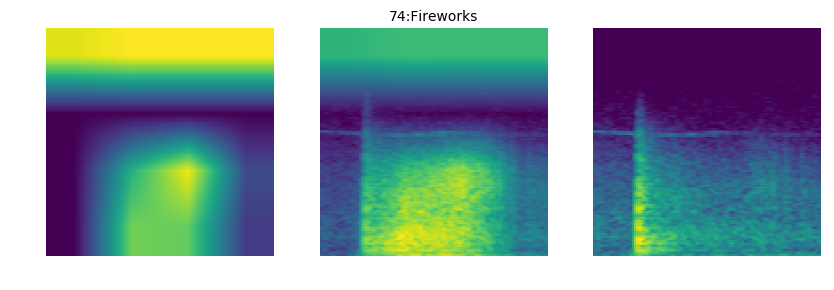

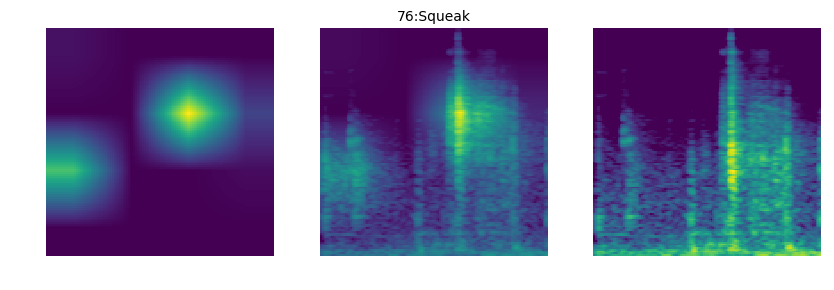

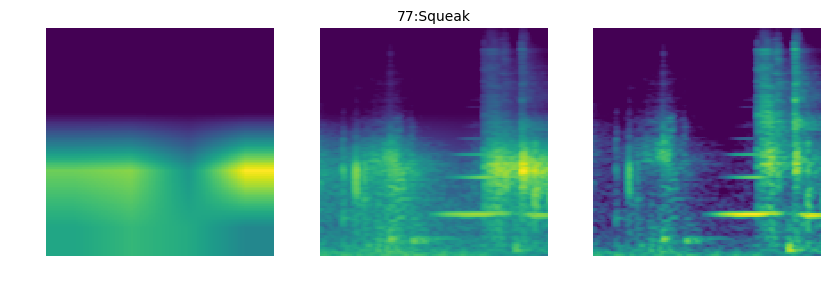

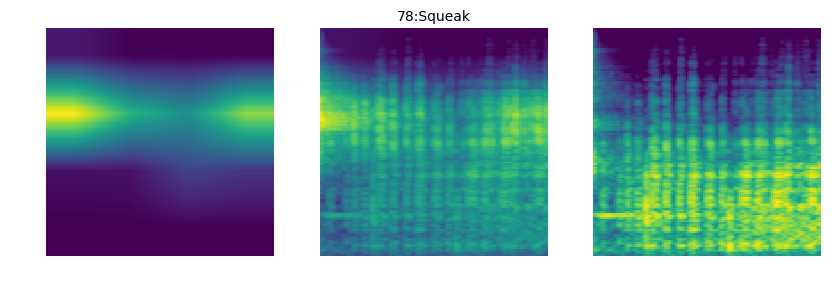

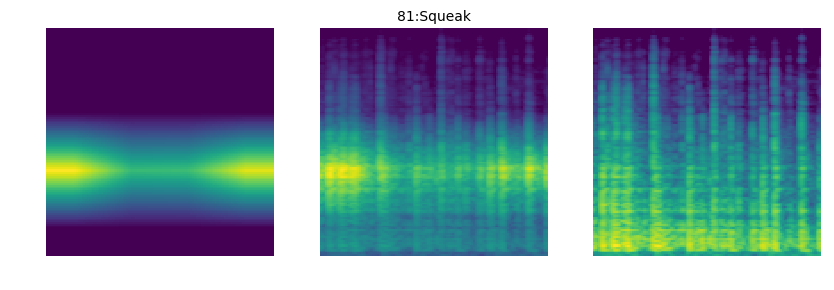

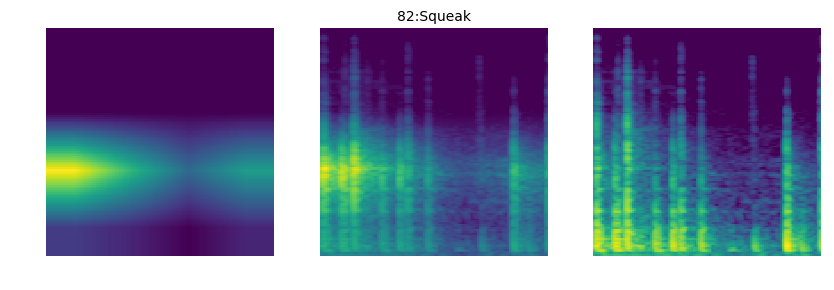

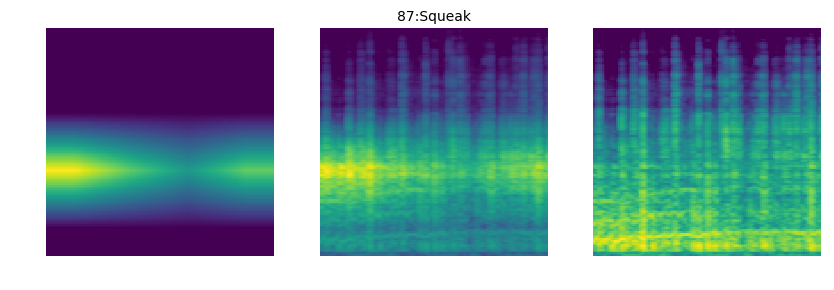

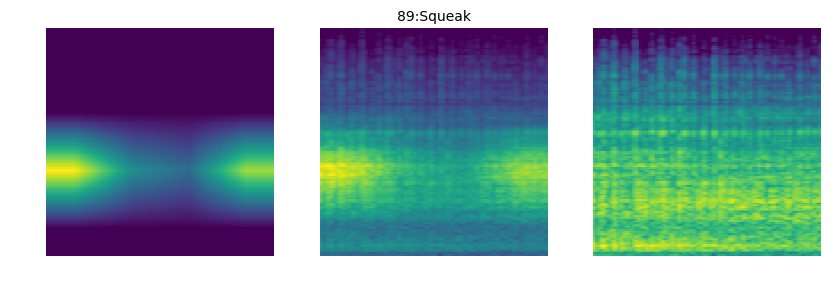

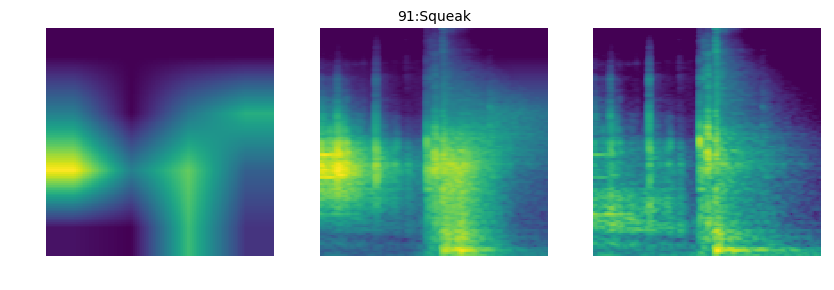

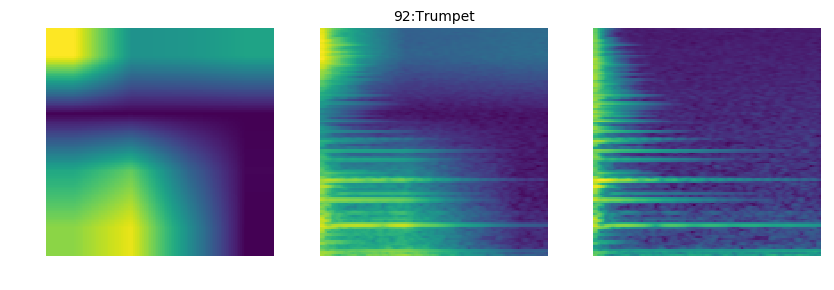

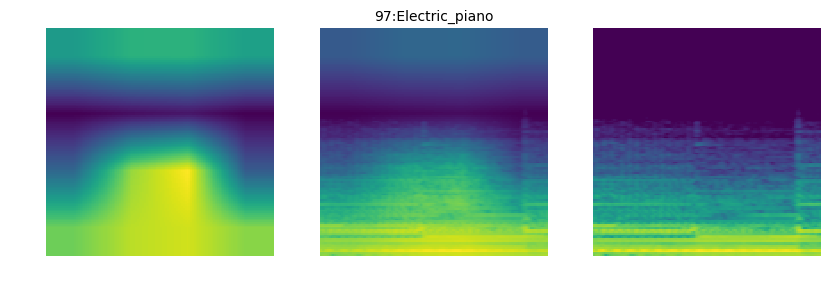

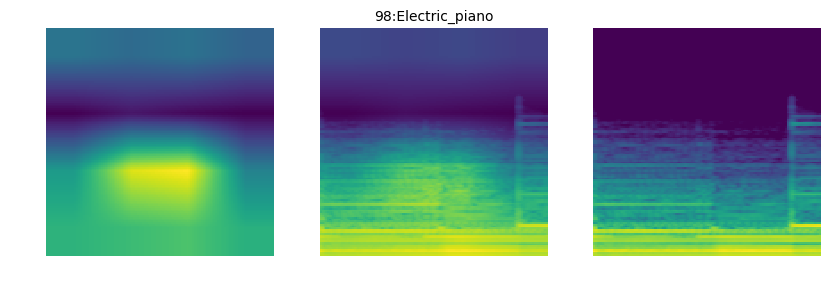

In [9]:
offset = 1000
for i, x in enumerate(X_train[offset:offset+100]):
    visualize_cam_audio(conf, model, x, '{}:{}'.format(i, conf.labels[np.argmax(y_train[offset + i])]))